<a href="https://colab.research.google.com/github/Alanoudhud/DataMining-Project/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 Part 1: Classification 🧑‍💻


 **Description**
In this part, we import the necessary libraries and load the dataset. We use a *Decision Tree classifier* for classification and will later evaluate its performance using Entropy and Gini index as criteria.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
df = pd.read_csv('lung_cancer_preprocessed.csv')
X = df.drop(['lung_cancer'], axis=1)
y = df['lung_cancer']
print(df.head())

   patient_id  age  gender  pack_years  radon_exposure  asbestos_exposure  \
0      100000    2       1    0.660248               2                  0   
1      100001    0       0    0.127785               2                  0   
2      100002    2       0    0.004055               1                  1   
3      100003    2       0    0.440640               0                  0   
4      100004    0       0    0.444313               1                  1   

   secondhand_smoke_exposure  copd_diagnosis  alcohol_consumption  \
0                          0               1                    1   
1                          1               1                    1   
2                          1               1                    0   
3                          1               0                    1   
4                          0               1                    0   

   family_history lung_cancer  
0               0          No  
1               1         Yes  
2               0         


####**Removing** **patient_id** and **lung_cancer** columns from features, and storing lung_cancer as target


In [ ]:
# التحضير للميزات (حذف عمود patient_id لأنه معرف)
X = df.drop(['lung_cancer', 'patient_id'], axis=1)
y = df['lung_cancer']  # Target

### 📊 **Splitting** the data into **70/30, 80/20,** and **90/10** for training and testing

In [ ]:
#    70% تدريب  30% اختبار
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)

#    80% تدريب  20% اختبار
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

#    90% تدريب  10% اختبار
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X, y, test_size=0.1, random_state=42)

### 🧠 **Training** Decision Trees with **Gini** criterion on different splits

In [ ]:
# معايير Gini
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train_70, y_train_70)

clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train_80, y_train_80)

clf_gini_90 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_90.fit(X_train_90, y_train_90)


DecisionTreeClassifier(random_state=42)

### 🧠 **Training** Decision Trees with **Entropy** criterion on different splits

In [ ]:
# معايير Entropy
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train_70, y_train_70)

clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train_80, y_train_80)

clf_entropy_90 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_90.fit(X_train_90, y_train_90)

DecisionTreeClassifier(criterion='entropy', random_state=42)

### **generate** predictions using both **Gini** and **Entropy** models for all split ratios.

In [ ]:
# التنبؤ باستخدام معيار Gini
y_pred_70_gini = clf_gini_70.predict(X_test_30)
y_pred_80_gini = clf_gini_80.predict(X_test_20)
y_pred_90_gini = clf_gini_90.predict(X_test_10)

# التنبؤ باستخدام معيار Entropy
y_pred_70_entropy = clf_entropy_70.predict(X_test_30)
y_pred_80_entropy = clf_entropy_80.predict(X_test_20)
y_pred_90_entropy = clf_entropy_90.predict(X_test_10)

### **calculate** the accuracy scores for all **Gini** and **Entropy** models across the different splits.

In [ ]:

# حساب دقة النموذج باستخدام معيار Gini
accuracy_70_gini = accuracy_score(y_test_30, y_pred_70_gini)
accuracy_80_gini = accuracy_score(y_test_20, y_pred_80_gini)
accuracy_90_gini = accuracy_score(y_test_10, y_pred_90_gini)

# حساب دقة النموذج باستخدام معيار Entropy
accuracy_70_entropy = accuracy_score(y_test_30, y_pred_70_entropy)
accuracy_80_entropy = accuracy_score(y_test_20, y_pred_80_entropy)
accuracy_90_entropy = accuracy_score(y_test_10, y_pred_90_entropy)

# طباعة الدقة لكل تقسيم
print("*Accuracy for Gini*")
print(f"70/30 Split: {accuracy_70_gini}")
print(f"80/20 Split: {accuracy_80_gini}")
print(f"90/10 Split: {accuracy_90_gini}")

print("\n*Accuracy for Entropy*")
print(f"70/30 Split: {accuracy_70_entropy}")
print(f"80/20 Split: {accuracy_80_entropy}")
print(f"90/10 Split: {accuracy_90_entropy}")

*Accuracy for Gini*
70/30 Split: 0.7294666666666667
80/20 Split: 0.6488
90/10 Split: 0.6378

*Accuracy for Entropy*
70/30 Split: 0.6517333333333334
80/20 Split: 0.6487
90/10 Split: 0.6346


### **compute** and **visualize** the **confusion** **matrices** for each model to evaluate prediction performance.

*Confusion Matrix for Gini*
70/30 Split:
[[1333 3329]
 [ 729 9609]]
80/20 Split:
[[1364 1754]
 [1758 5124]]
90/10 Split:
[[ 687  881]
 [ 930 2502]]

*Confusion Matrix for Entropy*
70/30 Split:
[[2031 2631]
 [2593 7745]]
80/20 Split:
[[1344 1774]
 [1739 5143]]
90/10 Split:
[[ 658  910]
 [ 917 2515]]


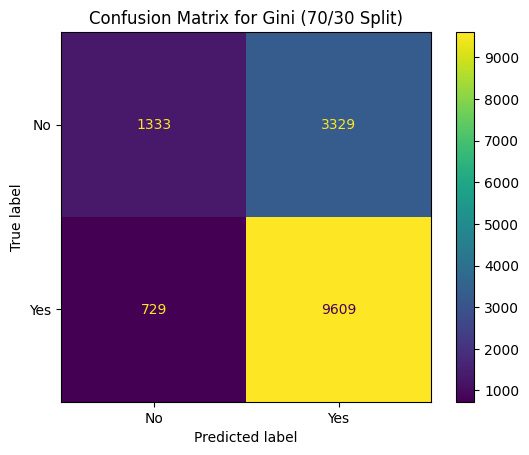

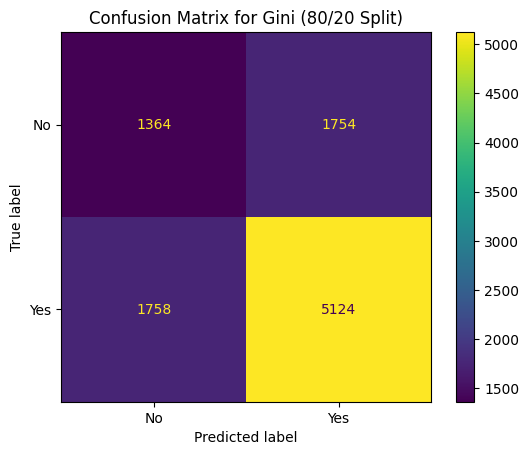

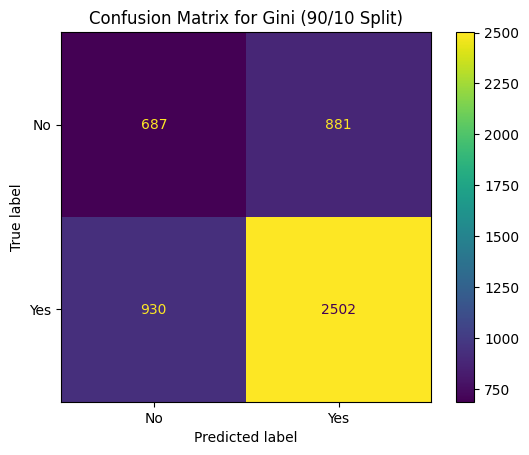

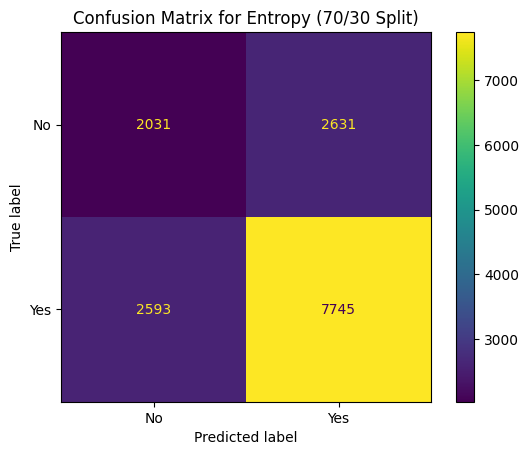

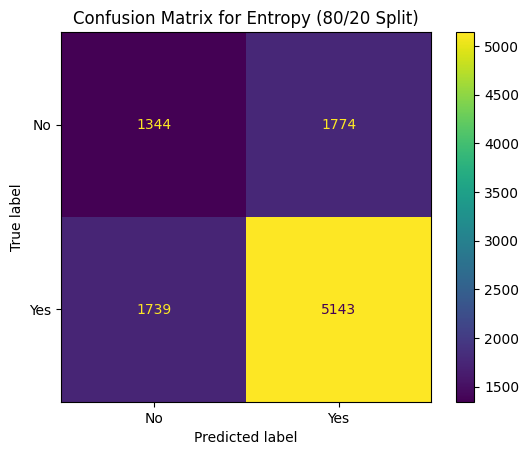

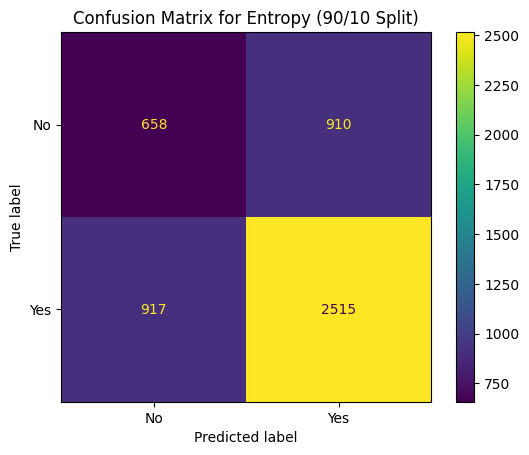

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# حساب مصفوفة الالتباس باستخدام Gini
cm_70_gini = confusion_matrix(y_test_30, y_pred_70_gini)
cm_80_gini = confusion_matrix(y_test_20, y_pred_80_gini)
cm_90_gini = confusion_matrix(y_test_10, y_pred_90_gini)

# حساب مصفوفة الالتباس باستخدام Entropy
cm_70_entropy = confusion_matrix(y_test_30, y_pred_70_entropy)
cm_80_entropy = confusion_matrix(y_test_20, y_pred_80_entropy)
cm_90_entropy = confusion_matrix(y_test_10, y_pred_90_entropy)

# طباعة مصفوفة الالتباس لكل تقسيم
print("*Confusion Matrix for Gini*")
print(f"70/30 Split:\n{cm_70_gini}")
print(f"80/20 Split:\n{cm_80_gini}")
print(f"90/10 Split:\n{cm_90_gini}")

print("\n*Confusion Matrix for Entropy*")
print(f"70/30 Split:\n{cm_70_entropy}")
print(f"80/20 Split:\n{cm_80_entropy}")
print(f"90/10 Split:\n{cm_90_entropy}")

# الحصول على أسماء التصنيفات من البيانات
cn = df['lung_cancer'].unique()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Gini
disp_70_gini = ConfusionMatrixDisplay(confusion_matrix=cm_70_gini, display_labels=cn)
disp_70_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (70/30 Split)")
plt.show()

disp_80_gini = ConfusionMatrixDisplay(confusion_matrix=cm_80_gini, display_labels=cn)
disp_80_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (80/20 Split)")
plt.show()

disp_90_gini = ConfusionMatrixDisplay(confusion_matrix=cm_90_gini, display_labels=cn)
disp_90_gini.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Gini (90/10 Split)")
plt.show()

# عرض مصفوفة الالتباس لكل تقسيم باستخدام Entropy
disp_70_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_70_entropy, display_labels=cn)
disp_70_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (70/30 Split)")
plt.show()

disp_80_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_80_entropy, display_labels=cn)
disp_80_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (80/20 Split)")
plt.show()

disp_90_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_90_entropy, display_labels=cn)
disp_90_entropy.plot(cmap='viridis')  # تم تغيير اللون إلى viridis
plt.title("Confusion Matrix for Entropy (90/10 Split)")
plt.show()

### **plot** the **Decision** **Tree** structure for the 70/30 model using the **Gini** criterion.

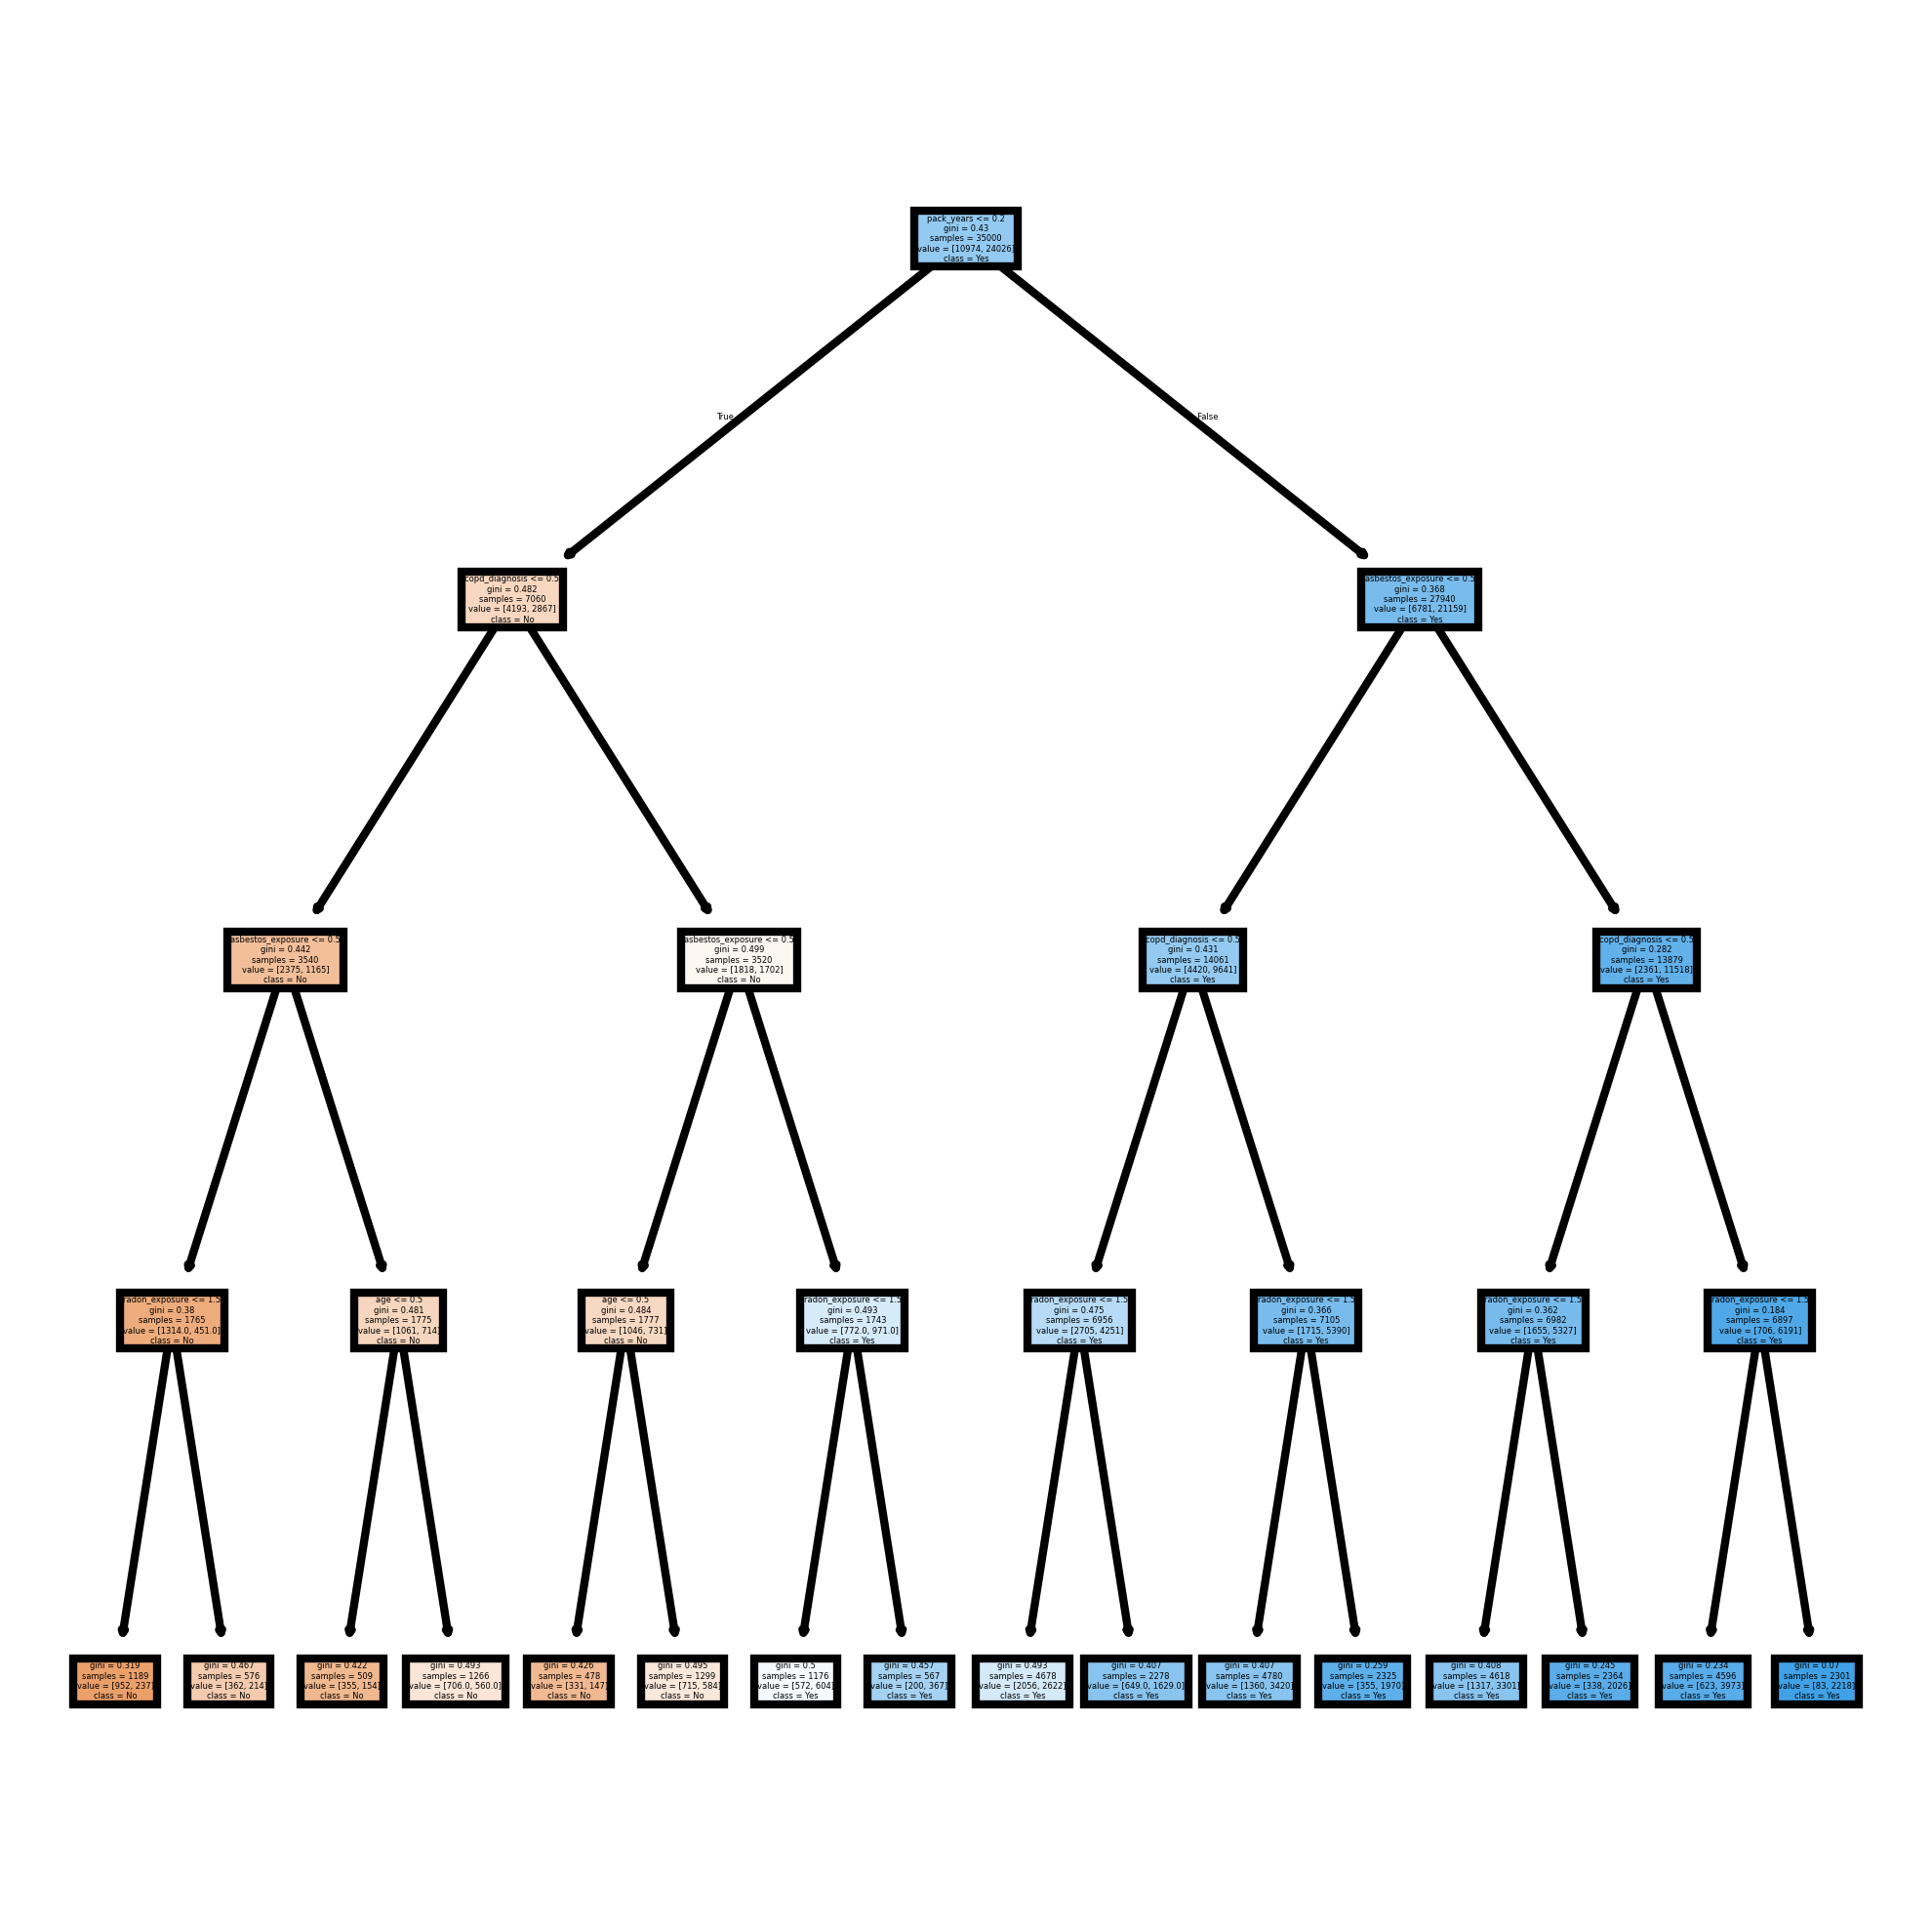

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# إنشاء نموذج شجرة القرار مع معيار Gini
clf_gini_70 = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

y_pred_70_gini = clf_gini_70.predict(X_test)

fn = X.columns
cn = y.unique()

# إعداد الرسم
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=600)
tree.plot_tree(clf_gini_70, feature_names=fn, class_names=cn, filled=True)


# عرض الشجرة
plt.show()

### **plot** the **Decision** **Tree** structure for the 70/30 model using the **Entropy** criterion.

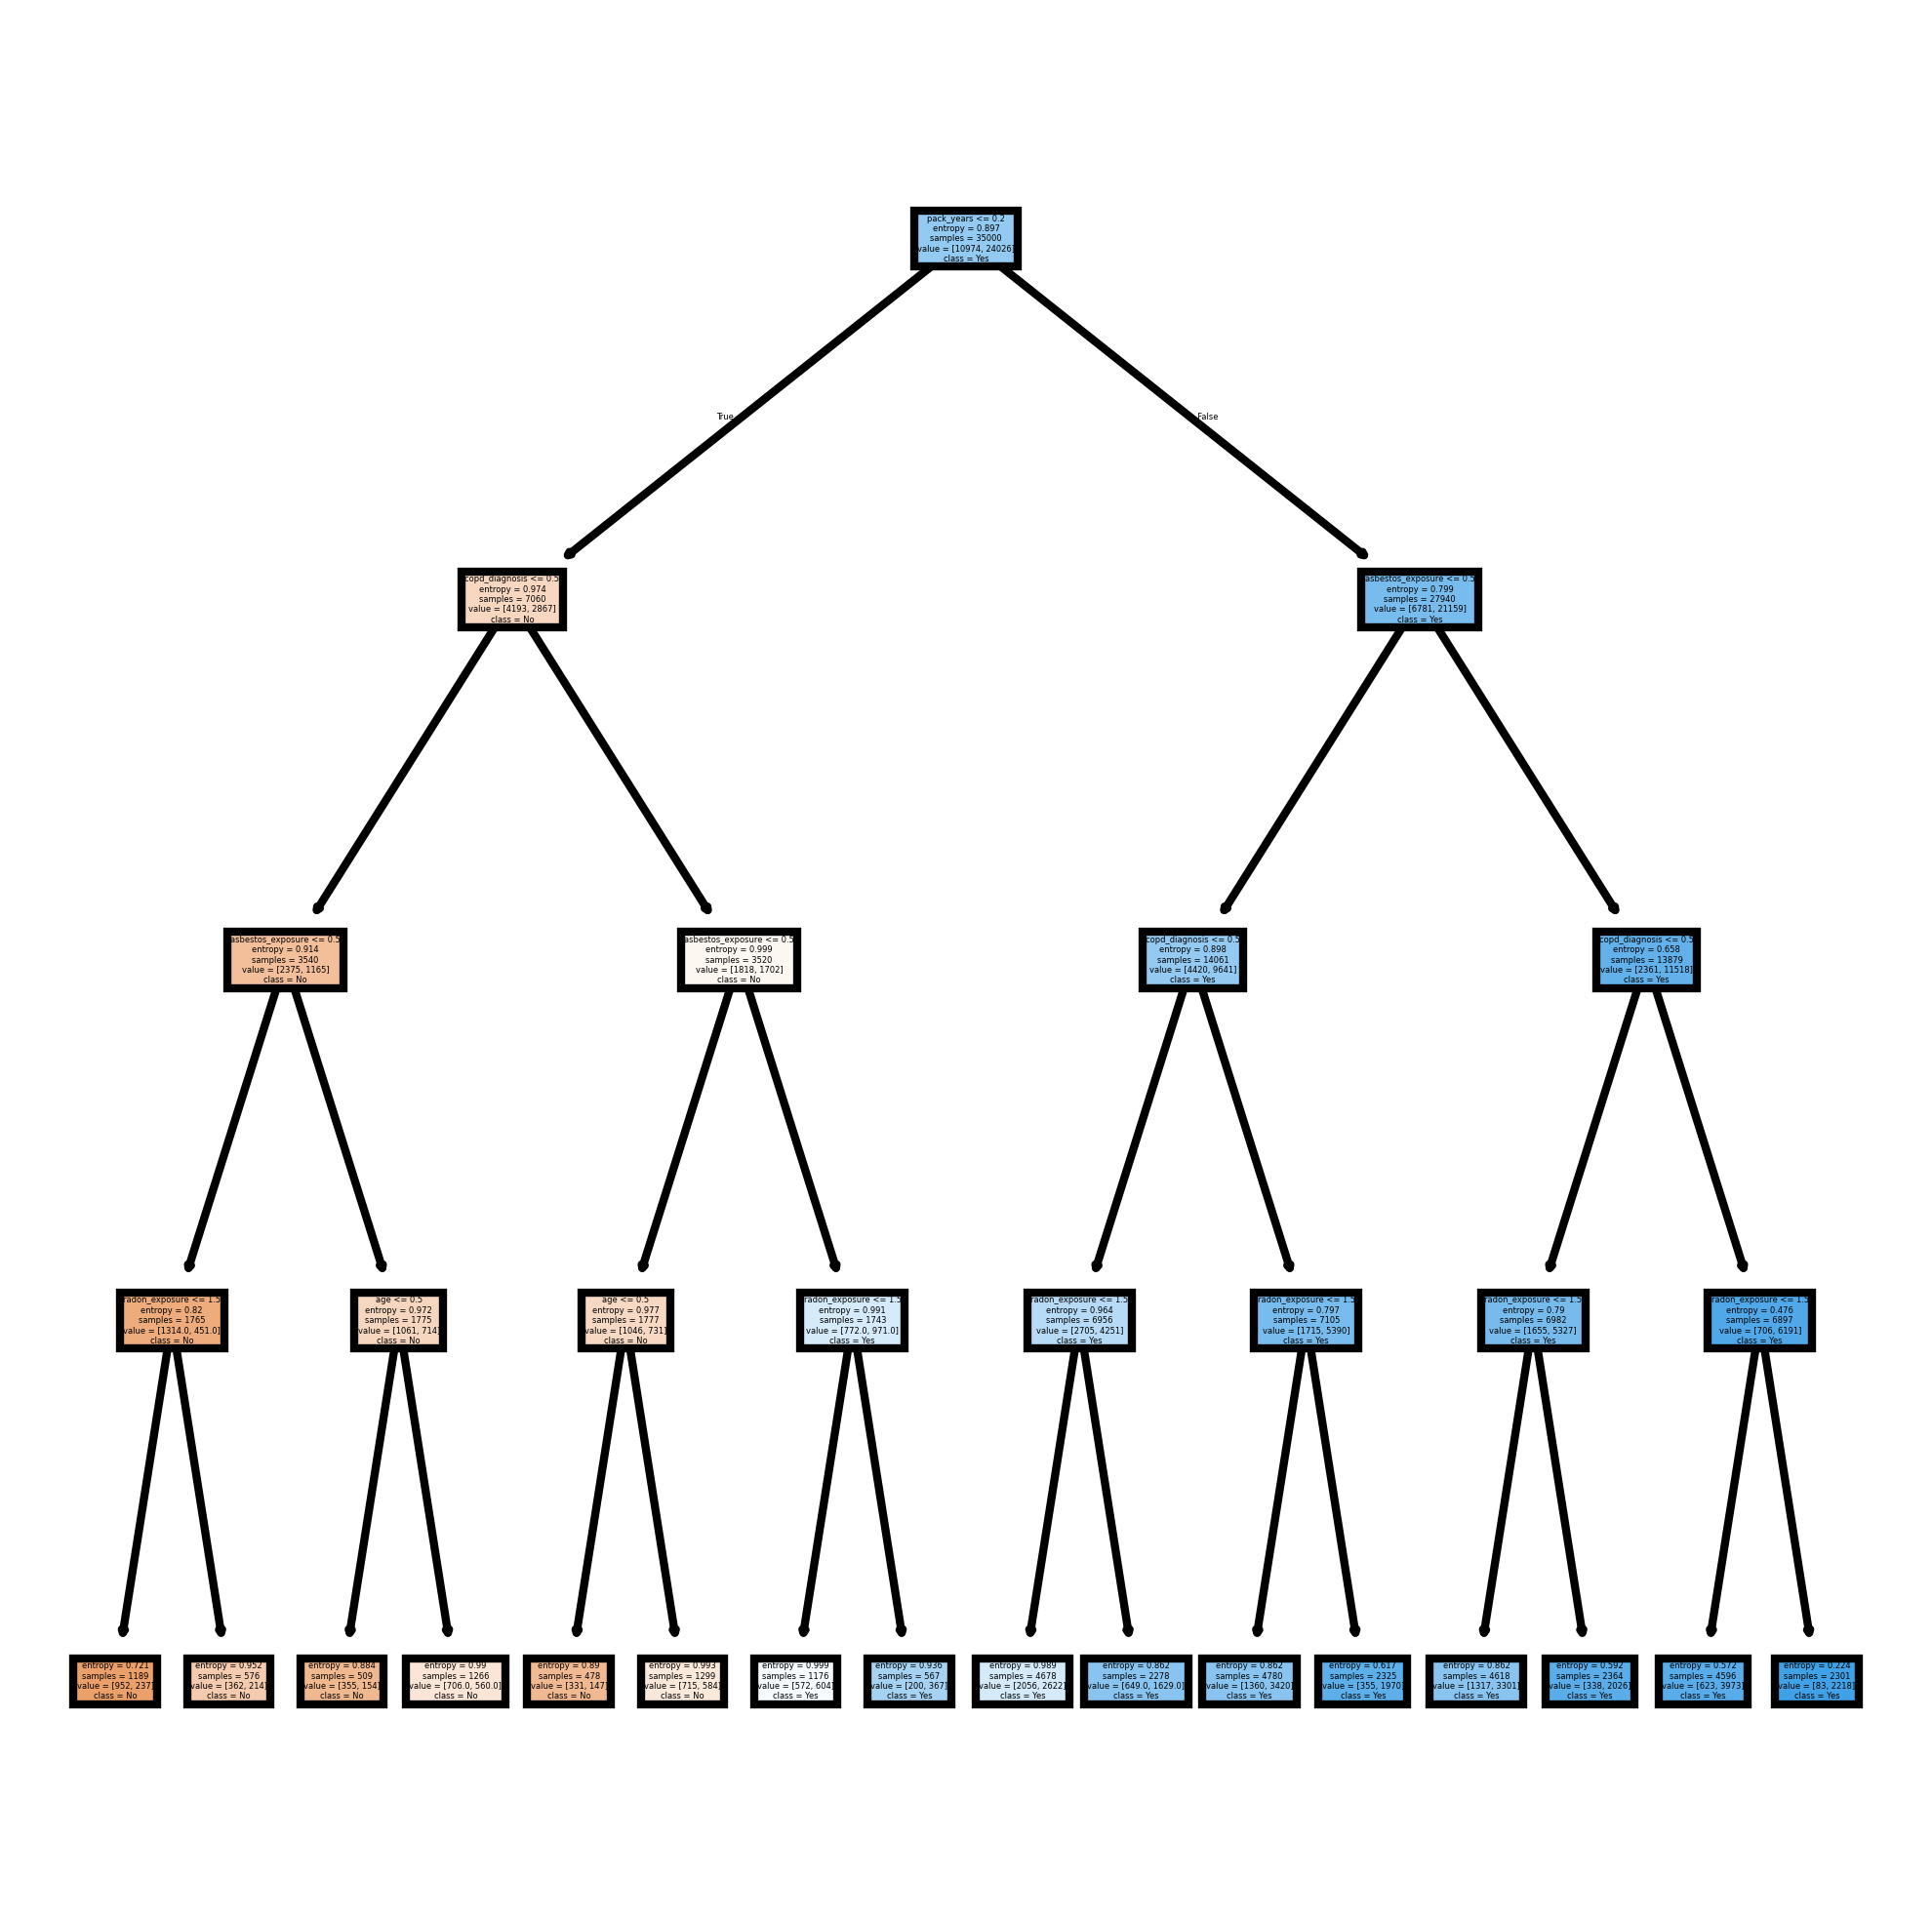

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("lung_cancer_preprocessed.csv")

X = data.drop('lung_cancer', axis=1)
y = data['lung_cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_entropy_70 = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

y_pred_70_entropy = clf_entropy_70.predict(X_test)

fn = X.columns
cn = y.unique()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=600)
tree.plot_tree(clf_entropy_70, feature_names=fn, class_names=cn, filled=True)

plt.show()